In [1]:
!pip install emoji # instalação da biblioteca dos emojis
!pip install emoji_data_python # instalação da biblioteca específica para análise de emojis
!pip install pyspellchecker # instalação da biblioteca que corrige ortografia
!pip install nltk
!pip install spacy
!pip install matplotlib
!pip install plotly
!pip install emoji_data_python
!pip install scikit-learn
!pip install spellchecker
!pip install wordcloud
!pip install beautifulsoup4
!pip install pyspellchecker
!pip install pyspellchecker==0.5.6
!pip install stopword
!pip install certifi --upgrade

In [2]:
import numpy as np
import pandas as pd
import csv
import nltk
import spacy
import re,string, unicodedata
import emoji
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import emoji_data_python
from collections import Counter
from textblob import TextBlob
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from plotly.subplots import make_subplots
from bs4 import BeautifulSoup

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('popular')
nltk.download('punkt')


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/henriharari/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/henriharari/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/henriharari/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/henriharari/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/henriharari/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/henriharari/nltk_data...
[nltk_data]    |   Pa

True

In [3]:
dados = pd.read_csv('/Users/henriharari/Downloads/2-base_10052023.xlsx - Sheet1.csv')
dados.head()

,id,"""dataPublicada""","""autor""","""texto""","""sentimento""","""tipoInteracao""","""anomalia""","""probabilidadeAnomalia""","""linkPost""","""processado""","""contemHyperlink"""
0,1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0


In [4]:
dados = dados.rename(columns={'"autor"': 'autor', '"texto"': 'texto'})

dados

,id,"""dataPublicada""",autor,texto,"""sentimento""","""tipoInteracao""","""anomalia""","""probabilidadeAnomalia""","""linkPost""","""processado""","""contemHyperlink"""
0,1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12350,3044013,"""2022-11-30 11:51:00""",onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,0
12351,3044212,"""2022-11-30 12:25:00""",amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0
12352,3044213,"""2022-11-30 12:18:00""",jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0
12353,3044412,"""2022-11-30 12:50:00""",moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0


In [5]:
dados.head()

,id,"""dataPublicada""",autor,texto,"""sentimento""","""tipoInteracao""","""anomalia""","""probabilidadeAnomalia""","""linkPost""","""processado""","""contemHyperlink"""
0,1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0


In [6]:
dados.dtypes


id                          int64
"dataPublicada"            object
autor                      object
texto                      object
"sentimento"               object
"tipoInteracao"            object
"anomalia"                  int64
"probabilidadeAnomalia"     int64
"linkPost"                 object
"processado"                int64
"contemHyperlink"           int64
dtype: object

In [7]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12355 entries, 0 to 12354
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       12355 non-null  int64 
 1   "dataPublicada"          12355 non-null  object
 2   autor                    12355 non-null  object
 3   texto                    12355 non-null  object
 4   "sentimento"             12355 non-null  object
 5   "tipoInteracao"          12355 non-null  object
 6   "anomalia"               12355 non-null  int64 
 7   "probabilidadeAnomalia"  12355 non-null  int64 
 8   "linkPost"               12355 non-null  object
 9   "processado"             12355 non-null  int64 
 10  "contemHyperlink"        12355 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.0+ MB


In [8]:
dados.describe()


,id,"""anomalia""","""probabilidadeAnomalia""","""processado""","""contemHyperlink"""
count,1.235500e+04,12355.000000,12355.000000,12355.0,12355.000000
mean,1.757789e+06,0.222339,37.325698,0.0,0.005423
std,7.967971e+05,0.415835,16.374936,0.0,0.073443
min,1.000000e+00,0.000000,7.000000,0.0,0.000000
25%,1.314377e+06,0.000000,24.000000,0.0,0.000000
50%,1.783879e+06,0.000000,37.000000,0.0,0.000000
75%,2.388714e+06,0.000000,48.000000,0.0,0.000000
max,3.045012e+06,1.000000,100.000000,0.0,1.000000


In [9]:
dados.isnull().sum()


id                         0
"dataPublicada"            0
autor                      0
texto                      0
"sentimento"               0
"tipoInteracao"            0
"anomalia"                 0
"probabilidadeAnomalia"    0
"linkPost"                 0
"processado"               0
"contemHyperlink"          0
dtype: int64

In [10]:
dados.shape


(12355, 11)

# Doc2Vec
O Doc2Vec é um modelo de aprendizado de máquina usado para representar documentos em formato vetorial. Ele é uma extensão do modelo Word2Vec, que é usado para representar palavras em vetores. O Doc2Vec permite que documentos inteiros sejam representados como vetores contínuos de valores numéricos.



In [54]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

# Crie uma lista de TaggedDocuments contendo os textos do seu dataframe
tagged_data = [TaggedDocument(words=word_tokenize(text.lower()), tags=[str(i)]) for i, text in enumerate(dados['texto'])]

# Defina os parâmetros do modelo Doc2Vec
vector_size = 100
epochs = 20

# Inicialize e treine o modelo Doc2Vec
model = Doc2Vec(vector_size=vector_size, min_count=2, epochs=epochs)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Exemplo de como obter o vetor de recursos para um texto específico
vector = model.infer_vector(word_tokenize("Exemplo de texto para obter o vetor de recursos"))

# Use o modelo treinado para inferir vetores de recursos para outros textos
vectors = [model.infer_vector(word_tokenize(text.lower())) for text in dados['texto']]


In [12]:
vectors

[array([-0.37679803,  0.18907528,  0.31597286, -0.21825573, -0.12514247,
        -0.5519649 , -0.21748097,  0.8972107 , -0.40793702, -0.8678777 ,
        -0.7581131 , -0.23692703,  0.2622276 ,  0.3959567 ,  0.09069528,
        -0.0369086 ,  0.5813357 , -0.20695548, -0.18576448, -1.2124797 ,
         0.29392955,  0.06107591,  0.27439517, -0.00287748,  0.08906088,
         0.47365806,  0.11327924, -0.22108881, -0.84953463,  0.33304372,
         0.6889177 , -0.02299862,  0.18196541, -0.46531707, -0.39236778,
         0.28733182,  0.11888161, -0.2853326 , -0.29196715, -0.63796043,
        -0.39179114, -0.40651107,  0.29528454,  0.28000703,  0.2928046 ,
        -0.0474232 , -0.07668099, -0.23065725, -0.01215478,  0.28018942,
        -0.37229702, -0.10389869, -0.68533254, -0.8737331 , -0.04207846,
         0.17526425,  0.23734763,  0.03540985, -0.04540809,  0.12453787,
        -0.11416968,  0.21396717, -0.15406577,  0.33450973, -0.31770054,
         0.6623885 ,  0.0223839 ,  0.52326316, -0.4

In [13]:
model

In [14]:
vector

array([-0.1325169 , -0.04726221,  0.14934783, -0.03767781, -0.06920666,
       -0.04122476,  0.02591362,  0.31626543, -0.02340592, -0.158276  ,
       -0.08516601, -0.02093958, -0.02093934,  0.09763726, -0.05461327,
       -0.00278955,  0.02642801,  0.04547046, -0.01712483, -0.10529127,
        0.04312903,  0.07370666,  0.07212561,  0.04265724, -0.07423072,
        0.05407846, -0.12107034, -0.12119322, -0.1233143 ,  0.06892643,
        0.09964214, -0.04466701,  0.08653138, -0.10563263, -0.07713994,
        0.06436658, -0.00134431, -0.06623676, -0.04359749, -0.13245814,
       -0.14248666,  0.05954389,  0.01975693,  0.14930342,  0.0985757 ,
        0.01982856,  0.02831822, -0.07738799,  0.07571295,  0.05743528,
       -0.03668262, -0.10650563, -0.04346158, -0.13940258,  0.11687369,
        0.05702008,  0.12370675,  0.02949299, -0.00821897,  0.11891183,
       -0.05668746,  0.16546923,  0.01526413,  0.14860757,  0.05232591,
        0.11371981,  0.05640494,  0.04996004,  0.01021957,  0.12

# Regressão Logística 
Para implementar um modelo de regressão logística em um modelo Doc2Vec, é necessário pré-processar e tokenizar os documentos, treinar o modelo Doc2Vec com os documentos pré-processados, extrair os vetores de documentos do modelo e usar esses vetores como entrada para o modelo de regressão logística.




In [51]:
#REGRESSÃO LOGÍSTICA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Preparar os dados
X = vectors
y = dados['"sentimento"']  # Substitua 'rotulo' pelo nome correto da coluna de rótulos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão logística
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Exibir as métricas de avaliação
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix)
print("Classification Report:")
print(classification_report)


Accuracy: 0.6175637393767706
Confusion Matrix:
[[204 219  84]
 [ 39 823 196]
 [ 49 358 499]]
Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.70      0.40      0.51       507
     NEUTRAL       0.59      0.78      0.67      1058
    POSITIVE       0.64      0.55      0.59       906

    accuracy                           0.62      2471
   macro avg       0.64      0.58      0.59      2471
weighted avg       0.63      0.62      0.61      2471



# Matriz de Confusão - Regressão Logística

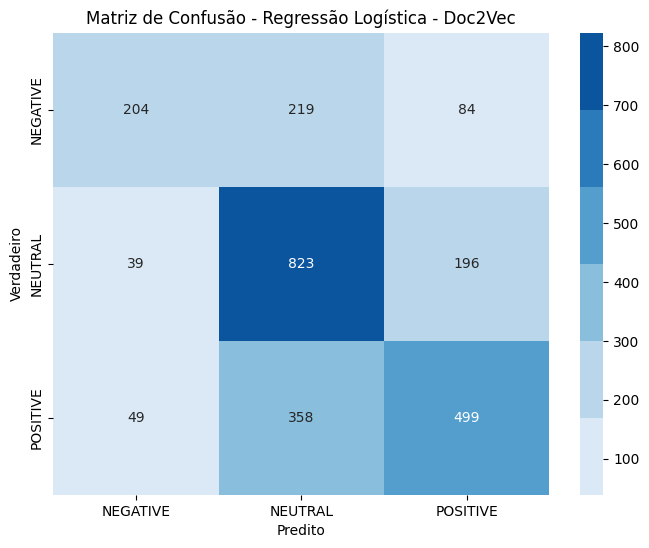

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definir os rótulos das classes
labels = model_lr.classes_

# Criar um mapa de cores para a matriz de confusão
cmap = sns.color_palette("Blues")

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusão - Regressão Logística - Doc2Vec")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()


In [31]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Preparar os dados
X = vectors
y = dados['"sentimento"']  # Substitua 'rotulo' pelo nome correto da coluna de rótulos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão logística
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Exibir as métricas de avaliação
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)


Confusion Matrix:
[[204 219  84]
 [ 39 823 196]
 [ 49 358 499]]
Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.70      0.40      0.51       507
     NEUTRAL       0.59      0.78      0.67      1058
    POSITIVE       0.64      0.55      0.59       906

    accuracy                           0.62      2471
   macro avg       0.64      0.58      0.59      2471
weighted avg       0.63      0.62      0.61      2471



# Curva ROC - Regressão Logística


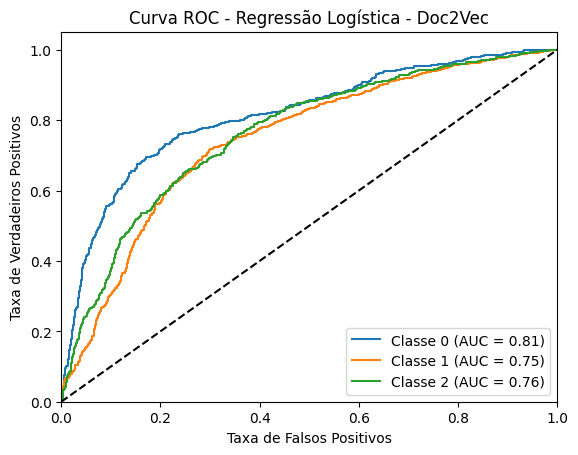

In [32]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import numpy as np

# Preparar os dados
X = vectors
y = dados['"sentimento"']

# Binarizar os rótulos
y_bin = label_binarize(y, classes=np.unique(y))

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Inicializar o modelo de regressão logística
model_lr = LogisticRegression()

# Lista para armazenar as curvas ROC de cada classe
roc_curves = []

# Treinar um classificador para cada classe
for i in range(y_train.shape[1]):
    # Treinar o modelo de regressão logística para a classe i
    model_lr.fit(X_train, y_train[:, i])
    
    # Obter as probabilidades previstas para a classe i
    y_scores = model_lr.predict_proba(X_test)[:, 1]
    
    # Calcular a curva ROC para a classe i
    fpr, tpr, _ = roc_curve(y_test[:, i], y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Armazenar a curva ROC da classe i
    roc_curves.append((fpr, tpr, roc_auc))

# Plotar as curvas ROC de cada classe
plt.figure()

for i, curve in enumerate(roc_curves):
    fpr, tpr, roc_auc = curve
    plt.plot(fpr, tpr, label='Classe {0} (AUC = {1:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Regressão Logística - Doc2Vec')
plt.legend(loc="lower right")
plt.show()


 # Random Search
 Para implementar um modelo de Random Search em um modelo Doc2Vec, foi definido um espaço de hiperparâmetros a serem otimizados. Em seguida, realizo uma busca aleatória nos hiperparâmetros, depois foi treinado o modelo Doc2Vec com cada conjunto de hiperparâmetros e foi alvaliado o desempenho do modelo usando uma métrica apropriada. Assim foi repitido esses passos de busca aleatória e avaliação até encontrar os melhores hiperparâmetros para o modelo Doc2Vec.






In [20]:
#random search 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dividir os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(vectors, dados['"sentimento"'], test_size=0.2, random_state=42)

# Criar uma instância do classificador de regressão logística
model_lr = LogisticRegression()

# Definir os parâmetros para a pesquisa aleatória
param_grid = {'C': [0.1, 1.0, 10.0],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

# Criar uma instância da pesquisa aleatória
random_search = RandomizedSearchCV(
    estimator=model_lr,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42
)

# Executar a pesquisa aleatória
random_search.fit(x_train, y_train)

# Melhor modelo encontrado durante a pesquisa
best_model = random_search.best_estimator_

# Fazer previsões no conjunto de teste usando o melhor modelo
y_pred = best_model.predict(x_test)

# Avaliar o melhor modelo
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Exibir as métricas de avaliação do melhor modelo
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Accuracy: 0.6171590449210845
Confusion Matrix:
[[206 217  84]
 [ 40 822 196]
 [ 52 357 497]]
Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.69      0.41      0.51       507
     NEUTRAL       0.59      0.78      0.67      1058
    POSITIVE       0.64      0.55      0.59       906

    accuracy                           0.62      2471
   macro avg       0.64      0.58      0.59      2471
weighted avg       0.63      0.62      0.61      2471



# Naive Bayes
Primeiro acontece o Pré-processamento e tokenização dos documentos.
Depois o Treino do modelo Doc2Vec usando os documentos pré-processados, e 
extração dos vetores de documentos do modelo Doc2Vec.
Assim, teve o uso os vetores de documentos como entrada para um modelo de Naive Bayes, e o
treino do modelo de Naive Bayes com os vetores de documentos.
Por fim, a avaliação do desempenho do modelo usando métricas apropriadas.

In [21]:
#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Criar uma instância do vetorizador de contagem de palavras
vectorizer = CountVectorizer()

# Transformar os textos em uma matriz de contagem de palavras
x = vectorizer.fit_transform(dados['texto'])

# Criar uma instância do classificador Naive Bayes Multinomial
model_nb = MultinomialNB()

# Treinar o modelo usando a matriz de contagem de palavras e os rótulos correspondentes
model_nb.fit(x, dados['"sentimento"'])

# Transformar os textos de teste em uma matriz de contagem de palavras
x_test = vectorizer.transform(dados['texto'])

# Fazer previsões nos vetores de recursos do conjunto de teste
y_pred_nb = model_nb.predict(x_test)

# Avaliar o modelo Naive Bayes Multinomial
accuracy_nb = accuracy_score(dados['"sentimento"'], y_pred_nb)
cm_nb = confusion_matrix(dados['"sentimento"'], y_pred_nb)
report_nb = classification_report(dados['"sentimento"'], y_pred_nb)

# Exibir as métricas de avaliação do modelo Naive Bayes Multinomial
print("Accuracy (Naive Bayes Multinomial):", accuracy_nb)
print("Confusion Matrix (Naive Bayes Multinomial):")
print(cm_nb)
print("Classification Report (Naive Bayes Multinomial):")
print(report_nb)


Accuracy (Naive Bayes Multinomial): 0.8104411169566977
Confusion Matrix (Naive Bayes Multinomial):
[[2167  136  221]
 [ 480 3905  959]
 [ 298  248 3941]]
Classification Report (Naive Bayes Multinomial):
              precision    recall  f1-score   support

    NEGATIVE       0.74      0.86      0.79      2524
     NEUTRAL       0.91      0.73      0.81      5344
    POSITIVE       0.77      0.88      0.82      4487

    accuracy                           0.81     12355
   macro avg       0.81      0.82      0.81     12355
weighted avg       0.82      0.81      0.81     12355



# Divindo dados em conjunto de treino e teste
O código realiza a implementação de um modelo de Naive Bayes Multinomial usando scikit-learn. Ele divide os dados em conjuntos de treinamento e teste, cria uma instância do vetorizador de contagem de palavras, transforma os textos em matrizes de contagem de palavras, cria uma instância do classificador Naive Bayes Multinomial, treina o modelo, faz previsões nos conjuntos de treinamento e teste, avalia a acurácia do modelo e exibe a acurácia de treinamento e teste.






In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(dados['texto'], dados['"sentimento"'], test_size=0.2, random_state=42)

# Criar uma instância do vetorizador de contagem de palavras
vectorizer = CountVectorizer()

# Transformar os textos de treinamento em uma matriz de contagem de palavras
x_train = vectorizer.fit_transform(x_train)

# Transformar os textos de teste em uma matriz de contagem de palavras
x_test = vectorizer.transform(x_test)

# Criar uma instância do classificador Naive Bayes Multinomial
model_nb = MultinomialNB()

# Treinar o modelo usando a matriz de contagem de palavras e os rótulos correspondentes do conjunto de treinamento
model_nb.fit(x_train, y_train)

# Fazer previsões nos vetores de recursos do conjunto de treinamento e de teste
y_pred_train = model_nb.predict(x_train)
y_pred_test = model_nb.predict(x_test)

# Avaliar a acurácia do modelo Naive Bayes Multinomial nos conjuntos de treinamento e teste
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Exibir a acurácia de treinamento e de teste
print("Accuracy (Naive Bayes Multinomial - Training):", accuracy_train)
print("Accuracy (Naive Bayes Multinomial - Test):", accuracy_test)


Accuracy (Naive Bayes Multinomial - Training): 0.8188992310805342
Accuracy (Naive Bayes Multinomial - Test): 0.734925131525698


# Curva ROC - Naive Bayes

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/var/folders/dd/fv99qprx0xs705dmngh1dm6c0000gn/T/ipykernel_4244/883564566.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: Und

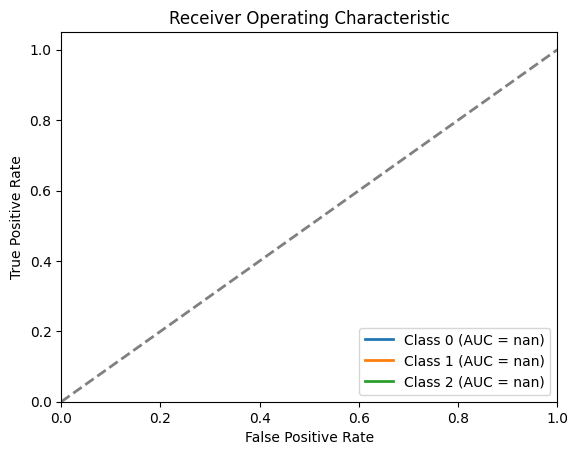

In [47]:
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from matplotlib import cm

# Criar um classificador Naive Bayes Multinomial
classifier = MultinomialNB()

# Criar um classificador multiclasse utilizando OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(classifier)

# Treinar o classificador utilizando os dados de treinamento
ovr_classifier.fit(X_train, y_train)

# Obter as probabilidades previstas para as classes
y_scores = ovr_classifier.predict_proba(X_test)

# Binarizar os rótulos de teste para a classe atual
y_test_binary = label_binarize(y_test, classes=[0, 1, 2])

# Calcular a curva ROC e a área sob a curva (AUC) para cada classe
n_classes = y_test_binary.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

# Obter um mapa de cores para o número de classes
cmap = cm.get_cmap('tab10')

# Plotar a curva ROC para cada classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    color = cmap(i)
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

# Configurações adicionais do gráfico
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()


# Rede Neural
No código fornecido, a conexão entre a rede neural e o Doc2Vec é estabelecida da seguinte maneira:

Criação dos vetores de recursos com o modelo Doc2Vec:

Um modelo Doc2Vec é inicializado e treinado com os textos fornecidos.
Os vetores de recursos são inferidos para cada texto usando o modelo treinado.
Utilização dos vetores de recursos na rede neural:

Os vetores de recursos inferidos pelo modelo Doc2Vec são utilizados como entrada para a rede neural.
A rede neural é criada usando a classe MLPClassifier do sklearn.neural_network.
Os vetores de recursos são passados como entrada para a rede neural durante o treinamento e a previsão.
Portanto, o Doc2Vec é usado para gerar vetores de recursos representativos para os textos, e esses vetores são então usados como entrada para a rede neural. Isso permite que a rede neural aprenda padrões nos vetores de recursos e faça previsões com base nessas representações aprendidas.

In [36]:
#REDE NEURAL

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(dados['texto'], dados['"sentimento"'], test_size=0.2, random_state=42)

# Criar uma instância do vetorizador de contagem de palavras
vectorizer = CountVectorizer()

# Transformar os textos de treinamento em uma matriz de contagem de palavras
x_train = vectorizer.fit_transform(x_train)

# Transformar os textos de teste em uma matriz de contagem de palavras
x_test = vectorizer.transform(x_test)

# Criar uma instância da rede neural
model_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Treinar a rede neural usando a matriz de contagem de palavras e os rótulos correspondentes do conjunto de treinamento
model_nn.fit(x_train, y_train)

# Fazer previsões nos vetores de recursos do conjunto de treinamento e de teste
y_pred_train = model_nn.predict(x_train)
y_pred_test = model_nn.predict(x_test)

# Avaliar a acurácia da rede neural nos conjuntos de treinamento e teste
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Exibir a acurácia de treinamento e de teste
print("Accuracy (Neural Network - Training):", accuracy_train)
print("Accuracy (Neural Network - Test):", accuracy_test)


Accuracy (Neural Network - Training): 0.9967624443545123
Accuracy (Neural Network - Test): 0.7385673816268717
